In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../../Large_data/loan/train_u6lujuX_CVtuZ9i.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#convert 'Credit_History' as an object because it is cointaing just 0 and 1
data['Credit_History'] = data['Credit_History'].astype('O')

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [7]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002006,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [8]:
X = data.drop(labels=['Loan_ID','Loan_Status'], axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban


In [9]:
Y = data['Loan_Status']
Y 

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
Y = le.fit_transform(Y)

In [11]:
X.shape, Y.shape

((614, 11), (614,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 351 to 559
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             418 non-null    object 
 1   Married            426 non-null    object 
 2   Dependents         417 non-null    object 
 3   Education          429 non-null    object 
 4   Self_Employed      403 non-null    object 
 5   ApplicantIncome    429 non-null    int64  
 6   CoapplicantIncome  429 non-null    float64
 7   LoanAmount         412 non-null    float64
 8   Loan_Amount_Term   418 non-null    float64
 9   Credit_History     392 non-null    object 
 10  Property_Area      429 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 40.2+ KB


In [13]:
X_train.isnull().mean().sort_values(ascending=False)

Credit_History       0.086247
Self_Employed        0.060606
LoanAmount           0.039627
Dependents           0.027972
Loan_Amount_Term     0.025641
Gender               0.025641
Married              0.006993
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
dtype: float64

In [14]:
pd.DataFrame(y_train).isnull().mean()

0    0.0
dtype: float64

Features are replaced as belwo rule:
   1. <=5% and categorlcal: with most frequent data
   2. >5% and categoriacl : with word "Missing"
   3. <5% and numerical: with mean

In [15]:
features_numeric = ['Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome']
features_categoric_one = ['Gender','Married','Dependents','Property_Area','Education']
features_categoric_two = ['Credit_History','Self_Employed']


In [16]:
#for mising data more than 5% we will replace nan value with a word "Missing"
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [17]:
 imputer_numeric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

imputer_categoric_one = Pipeline(
    steps=[('imputer',
            SimpleImputer(strategy='most_frequent'))])

imputer_categoric_two = Pipeline(
    steps=[('imputer',
            SimpleImputer(strategy='constant', fill_value='Missing'))])

# then we put the features list and the transformers together
# using the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('imputer_numeric',imputer_numeric,features_numeric),
    ('imputer_categoric_one',imputer_categoric_one,features_categoric_one),
    ('imputer_categoric_two',imputer_categoric_two,features_categoric_two)
])

In [18]:
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer_numeric',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['Loan_Amount_Term', 'LoanAmount',
                                  'CoapplicantIncome', 'Applican...
                                       

In [19]:
 preprocessor.transformers

[('imputer_numeric',
  Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False),
  ['Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']),
 ('imputer_categoric_one',
  Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='most_frequent',
                                 verbose=0))],
           verbose=False),
  ['Gender', 'Married', 'Dependents', 'Property_Area', 'Education']),
 ('imputer_categoric_two',
  Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True,
                                 fill_value='Missing', missing_values=nan,
             

In [20]:
# and we can look at the parameters learnt like this:

# for the numerical imputer
preprocessor.named_transformers_['imputer_numeric'].named_steps['imputer'].statistics_

array([ 341.9138756 ,  148.55339806, 1598.92988342, 5599.68531469])

In [21]:
preprocessor.named_transformers_['imputer_categoric_one'].named_steps['imputer'].statistics_

array(['Male', 'Yes', '0', 'Semiurban', 'Graduate'], dtype=object)

In [22]:
preprocessor.named_transformers_['imputer_categoric_two'].named_steps['imputer'].statistics_

array(['Missing', 'Missing'], dtype=object)

In [23]:
#First Transformation
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
X_train =  pd.DataFrame(X_train, columns=features_numeric+features_categoric_one+features_categoric_two)
X_test =  pd.DataFrame(X_test, columns=features_numeric+features_categoric_one+features_categoric_two) 

In [25]:
X_train.isnull().mean()

Loan_Amount_Term     0.0
LoanAmount           0.0
CoapplicantIncome    0.0
ApplicantIncome      0.0
Gender               0.0
Married              0.0
Dependents           0.0
Property_Area        0.0
Education            0.0
Credit_History       0.0
Self_Employed        0.0
dtype: float64

In [26]:
X_train['LoanAmount'].nunique()

173

In [27]:
X_test['Loan_Amount_Term'].unique()
X_test_cp = X_test[X_test['Loan_Amount_Term'] != 12.0 ]

In [28]:
X_test_cp['LoanAmount'].nunique()

102

In [29]:
X_test.isnull().mean()

Loan_Amount_Term     0.0
LoanAmount           0.0
CoapplicantIncome    0.0
ApplicantIncome      0.0
Gender               0.0
Married              0.0
Dependents           0.0
Property_Area        0.0
Education            0.0
Credit_History       0.0
Self_Employed        0.0
dtype: float64

In [30]:
 X_train.shape, X_test.shape

((429, 11), (185, 11))

In [31]:
 for col in features_categoric_one+features_categoric_two:
        print(X_train[col].value_counts())
        print("--------------------------")

Male      357
Female     72
Name: Gender, dtype: int64
--------------------------
Yes    296
No     133
Name: Married, dtype: int64
--------------------------
0     239
2      76
1      76
3+     38
Name: Dependents, dtype: int64
--------------------------
Semiurban    160
Urban        145
Rural        124
Name: Property_Area, dtype: int64
--------------------------
Graduate        336
Not Graduate     93
Name: Education, dtype: int64
--------------------------
1.0        326
0.0         66
Missing     37
Name: Credit_History, dtype: int64
--------------------------
No         340
Yes         63
Missing     26
Name: Self_Employed, dtype: int64
--------------------------


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
X_train['Credit_History'] = X_train['Credit_History'].astype(str)
X_test['Credit_History'] = X_test['Credit_History'].astype(str)

In [34]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [4,5,6,7,8,9,10])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

In [35]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [37]:

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [38]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*40)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is LogisticRegression at least for now, 
#SVC is just memorizing the data so it is overfitting .

LogisticRegression :
  pre: 0.782
  rec: 0.934
  f1: 0.851
  loss: 7.568
  acc: 0.781
----------------------------------------
KNeighborsClassifier :
  pre: 0.759
  rec: 0.906
  f1: 0.826
  loss: 8.856
  acc: 0.744
----------------------------------------
SVC :
  pre: 0.674
  rec: 1.000
  f1: 0.806
  loss: 11.191
  acc: 0.676
----------------------------------------
DecisionTreeClassifier :
  pre: 0.780
  rec: 0.983
  f1: 0.869
  loss: 6.843
  acc: 0.802
----------------------------------------


In [39]:
for name, model in models.items():
        print(name,':')
        loss(y_test, model.predict(X_test))
        print("------------------------------")

LogisticRegression :
  pre: 0.824
  rec: 0.940
  f1: 0.878
  loss: 6.534
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.727
  rec: 0.776
  f1: 0.751
  loss: 12.882
  acc: 0.627
------------------------------
SVC :
  pre: 0.724
  rec: 1.000
  f1: 0.840
  loss: 9.522
  acc: 0.724
------------------------------
DecisionTreeClassifier :
  pre: 0.815
  rec: 0.985
  f1: 0.892
  loss: 5.974
  acc: 0.827
------------------------------


The percentage of Y class : 0.69
The percentage of N class : 0.31


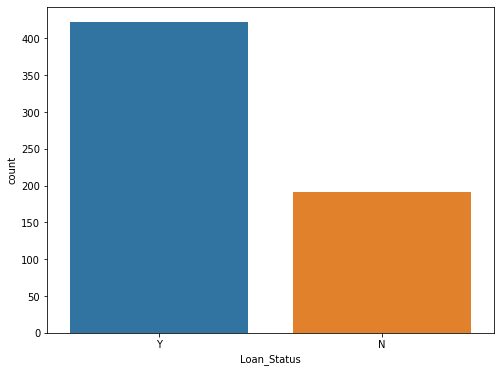

In [40]:
#checking the distribution of data from prediction column (Y)
df = data
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))